In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

## CONSTANTE DE TEMPS

In [2]:
def load(filename: str):
    return pd.read_csv(filename)

In [3]:
huile1_haut = load('../data/huile1_haut.csv')
huile1_bas = load('../data/huile1_bas.csv')
huile2_haut = load('../data/huile2_haut.csv')
huile2_bas = load('../data/huile2_bas.csv')

In [4]:
def sel_dist(arr: np.ndarray, dist: float) -> np.ndarray:
    idx = [0]
    for i, n in enumerate(arr[1:]):
        if abs(n - arr[idx[-1]]) > dist:
            idx.append(i+1)
    return np.array(idx)

In [5]:
def calc_tau(datas, densite):
    v_inf = distance_top_bottom / (unp.uarray(datas['Temps 2 [s]'], delta_t) - unp.uarray(datas['Temps 1 [s]'], delta_t))
    # Equilibre des forces
    # g(m - 4/3 pi r^3 densite_huile) - trainée = 0
    temp = 6 * np.pi * bille_rayon * v_inf
    eta = g * (bille_masse - densite * 4/3 * np.pi * bille_rayon**3) / temp
    
    tau = bille_masse/(6*np.pi*eta*bille_rayon)
    return tau

In [6]:
def calc_diff(datas, densite):
    tau = calc_tau(datas, densite)
    # diff = tau - unp.uarray(datas['Temps 1 [s]'], delta_t)
    diff = unp.uarray(datas['Temps 1 [s]'], delta_t)/tau
    print(np.exp(-nom_vals(diff)))
    print(np.min(diff))

    # print(f"{np.exp(-diff)} + %")
    return diff

In [7]:
def plot_and_print_tau(datas, densite, tol=1e-8, color=None, label=None):
    tau = calc_tau(datas, densite)
    T = unp.uarray(datas['Temperature [C]']+273.15, delta_T)

    idx_to_plot = sel_dist(T, tol)
    x = T[idx_to_plot]
    y = tau[idx_to_plot]

    plt.errorbar(nom_vals(x), nom_vals(y), xerr=std_devs(x), yerr=std_devs(y), ls='none', color=color, label=label)

In [8]:
axins_temp = ...


def plot_and_print_diff(datas, densite, tol=1e-8, color=None, label=None, zoom=False, axins=axins_temp):
    diff = calc_diff(datas, densite)
    T = unp.uarray(datas['Temperature [C]']+273.15, delta_T)

    idx_to_plot = sel_dist(T, tol)
    x = T[idx_to_plot]
    y = diff[idx_to_plot]
    
    
    plt.errorbar(nom_vals(x), nom_vals(y), xerr=std_devs(x), yerr=std_devs(y), ls='none', color=color, label=label)
    
    if zoom:
        axins.errorbar(nom_vals(x), nom_vals(y), xerr=std_devs(x), yerr=std_devs(y), ls='none', color=color)
        # axins.grid()

## Graff

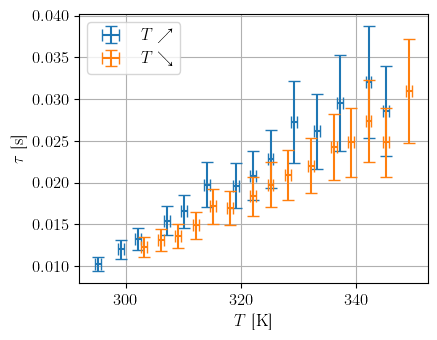

In [9]:
plot_and_print_tau(huile1_haut, densite_1, 2, label='$T\\nearrow$', color='tab:blue')
plot_and_print_tau(huile1_bas, densite_1, 2, label='$T\\searrow$', color='tab:orange')
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$\tau$ [\si{\second}]')
plt.legend()
plt.grid()
# plt.savefig('../figures/huile1_tau.pdf')

[2.75235194e-129 2.15199406e-160 1.21667192e-145 4.21374836e-130
 1.12287865e-122 2.50720969e-095 1.83691791e-087 3.81093732e-073
 5.85436766e-064 4.32309989e-055 3.31235017e-052 2.82717746e-044
 3.67269919e-049 8.18084815e-042 1.86856208e-037 9.53050839e-042
 7.38350669e-039 4.09218562e-033 4.68488474e-040 3.75010188e-032
 9.65999580e-031 3.39291532e-027 5.19192821e-032 6.99618723e-027
 1.14546991e-030 9.31697816e-028 2.97760133e-027]
60+/-14
[5.74541171e-027 3.01515384e-024 3.53947551e-025 2.08714915e-028
 2.05254550e-029 6.57740167e-025 1.06479624e-030 1.14546991e-030
 1.93205079e-026 7.09857812e-035 1.38018617e-035 4.94769867e-037
 1.85209400e-037 1.69604476e-042 1.69939348e-044 3.66899114e-039
 2.65334582e-038 4.99673647e-047 8.28222734e-050 6.57138895e-051
 6.69053810e-058 1.40490655e-053 1.04387260e-057 2.95157058e-054
 4.03451536e-059 6.75181318e-065 4.16658219e-058 3.32560203e-074
 2.98821860e-071 2.56004951e-078 5.17720783e-074 8.74978677e-081
 6.14985505e-087 4.74590408e-098

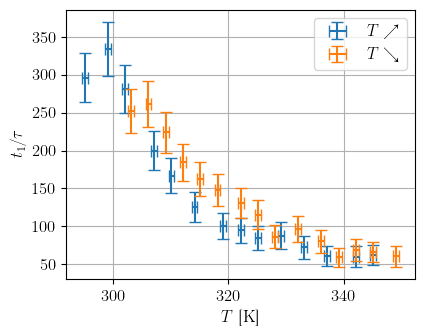

In [10]:
plot_and_print_diff(huile1_haut, densite_1, 2, label='$T\\nearrow$', color='tab:blue')
plot_and_print_diff(huile1_bas, densite_1, 2, label='$T\\searrow$', color='tab:orange')
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$t_1 / \tau$')
plt.legend()
plt.grid()
plt.savefig('../figures/huile1_tau.pdf')

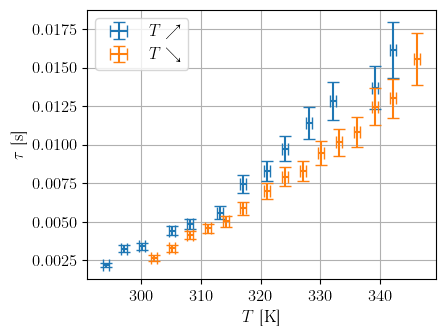

In [11]:
plot_and_print_tau(huile2_haut, densite_2, 2, label='$T\\nearrow$', color='tab:blue')
plot_and_print_tau(huile2_bas, densite_2, 2, label='$T\\searrow$', color='tab:orange')
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$\tau$ [\si{\second}]')
plt.legend()
plt.grid()
# plt.savefig('../figures/huile2_tau.pdf')

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 2.23493425e-311
 1.02580762e-269 2.77814335e-240 1.22551148e-217 2.71472445e-196
 1.27222277e-166 3.20531467e-162 2.06602607e-140 2.33423165e-139
 3.21200592e-116 1.67080036e-109 2.18675631e-099]
227+/-28
[1.29120934e-112 4.72596833e-121 2.04266146e-124 6.08156746e-139
 4.96512429e-130 3.94537297e-152 1.82521518e-147 3.56231556e-158
 1.12364434e-164 9.29323275e-203 1.34336017e-208 1.15396544e-236
 1.11223804e-236 2.75573668e-243 3.53704151e-266 9.99764457e-277
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+00

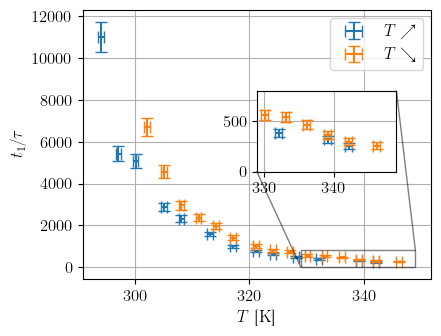

In [12]:
x1, x2, y1, y2 = 329, 349, 0, 800
axins = plt.gca().inset_axes(
    [0.5, 0.4, 0.4, 0.3],
    xlim=(x1, x2), ylim=(y1, y2)
)
axins.grid()




plot_and_print_diff(huile2_haut, densite_2, 2, label='$T\\nearrow$', color='tab:blue', zoom=True, axins=axins)
plot_and_print_diff(huile2_bas, densite_2, 2, label='$T\\searrow$', color='tab:orange', zoom=True, axins=axins)

plt.gca().indicate_inset_zoom(axins, edgecolor="black")


plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$t_1 / \tau$')
plt.legend()
plt.grid()
plt.savefig('../figures/huile2_tau.pdf')